# Who is the most prolific artist in hip hop?

I'm curious about a very broad measure of prolificity: number of releases per year. The number of releases is defined as the number of torrents on What.CD, and the number of releases is defined as the range of years in which the artist released new music on the website. Releases per year is then just the number or resales divided by the range in years.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

#set matplotlib rc
matplotlib.rcParams.update({'font.size': 14})

# get the data...
con = sqlite3.connect('data.db')
torrents = pd.read_sql_query('SELECT * from torrents;', con)
con.close()

# only consider releases containing 'new' material
torrents = torrents[torrents.releaseType.isin(['single','ep','album','mixtape'])]
torrents = torrents[~torrents.artist.isin(['various artists'])]

# define a function to plot bar graphs
def plotbars(h, data, topn = 10):
    xticks = np.arange(topn)
    vals = data.sort_values(ascending = False)[:topn]
    
    # plot bars
    h.bar(xticks-0.5, vals, width = 1.0, color = 'red')
    h.set_xticks([])
    h.axis([-0.5, topn-0.5, 0, max(vals) + max(vals)*0.05])
    
    # plot X axis ticks
    for j in range(topn):  
        h.text(xticks[j], 0, vals.index[j] + ' ', 
            ha = 'right', va = 'top', rotation = 60)

## Most prolific artists

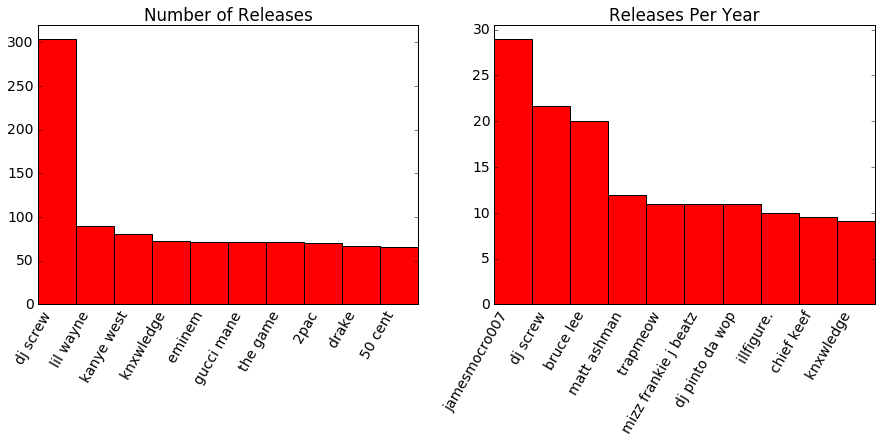

In [2]:
plt.close()

# group by artist
grouping = torrents.groupby('artist')

# count overall number of releases
counts = grouping.size()

# get years of activity
years = grouping.groupYear.agg(['min', 'max'])
ranges = years['max'] - years['min'] + 1

# get number of releases per year
releases_per_year = counts / ranges

# plotting
f, ax = plt.subplots(1, 2, figsize=(15, 5))
plotbars(ax[0], counts)
ax[0].set_title('Number of Releases')
plotbars(ax[1], releases_per_year)
ax[1].set_title('Releases Per Year')

plt.show()

[DJ Screw](https://en.wikipedia.org/wiki/DJ_Screw) is by far the most prolific artist in hip hop. In his fourteen year career, he put out more than three times as much as Lil Wayne (in the #2 spot). Dj Screw is only #2 in terms of releases per year: the top spot these goes to a relatively obscure producer, [jamesmocro007](https://soundcloud.com/soufyan), who released *29 singles* in 2013.